In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [53]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,desc

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [49]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


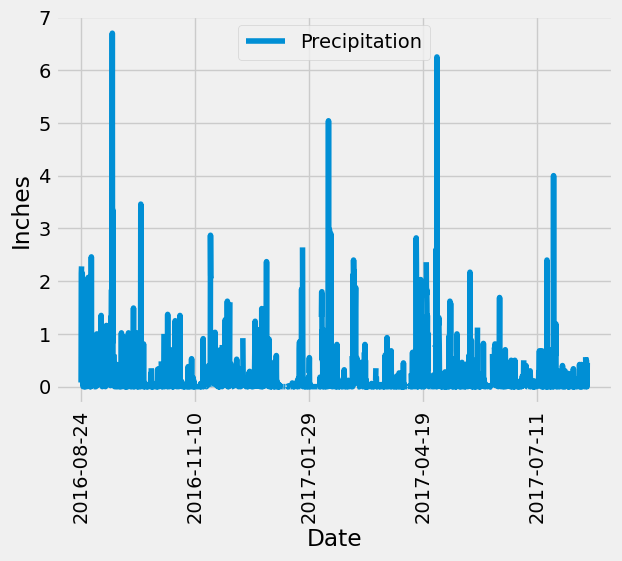

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_date 
most_recent_date = dt.datetime.strptime(most_recent_date[0],'%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_from = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_from).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_prcp_df = pd.DataFrame(last_year_prcp_data,columns=['Date','Precipitation'])

# Sort the dataframe by date
last_year_prcp_df = last_year_prcp_df.sort_values(by='Date') 

# Use Pandas Plotting with Matplotlib to plot the data
last_year_prcp_df.plot(x='Date', y='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()

In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = last_year_prcp_df['Precipitation'].describe()
print(summary_statistics)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(total_stations)

9


In [54]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
print (most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations_id = most_active_stations[0][0]
temperature_info = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_stations_id).all()
print(temperature_info)

[(54.0, 85.0, 71.66378066378067)]


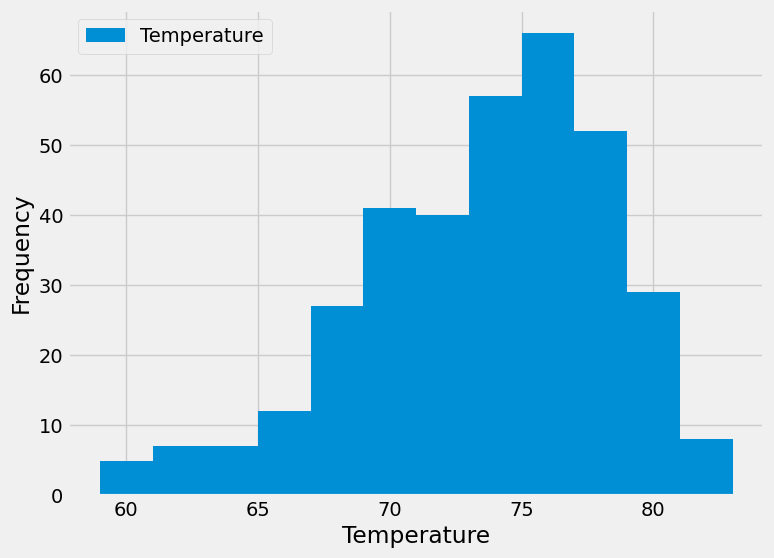

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station== most_active_stations_id).filter(Measurement.date >=one_year_from).order_by(Measurement.date).all()
temperature_df = pd.DataFrame(temperature_data,columns=['Date','Temperature'])
temperature_df.plot.hist(bins=12,figsize = (8,6))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [58]:
# Close Session
session.close()